In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import matplotlib.image as mpimg
%matplotlib inline

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-11-12 Python-3.8.13 torch-1.10.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24268MiB)

Fusing layers... 
YOLOv5l summary: 367 layers, 46533693 parameters, 0 gradients
Adding AutoShape... 


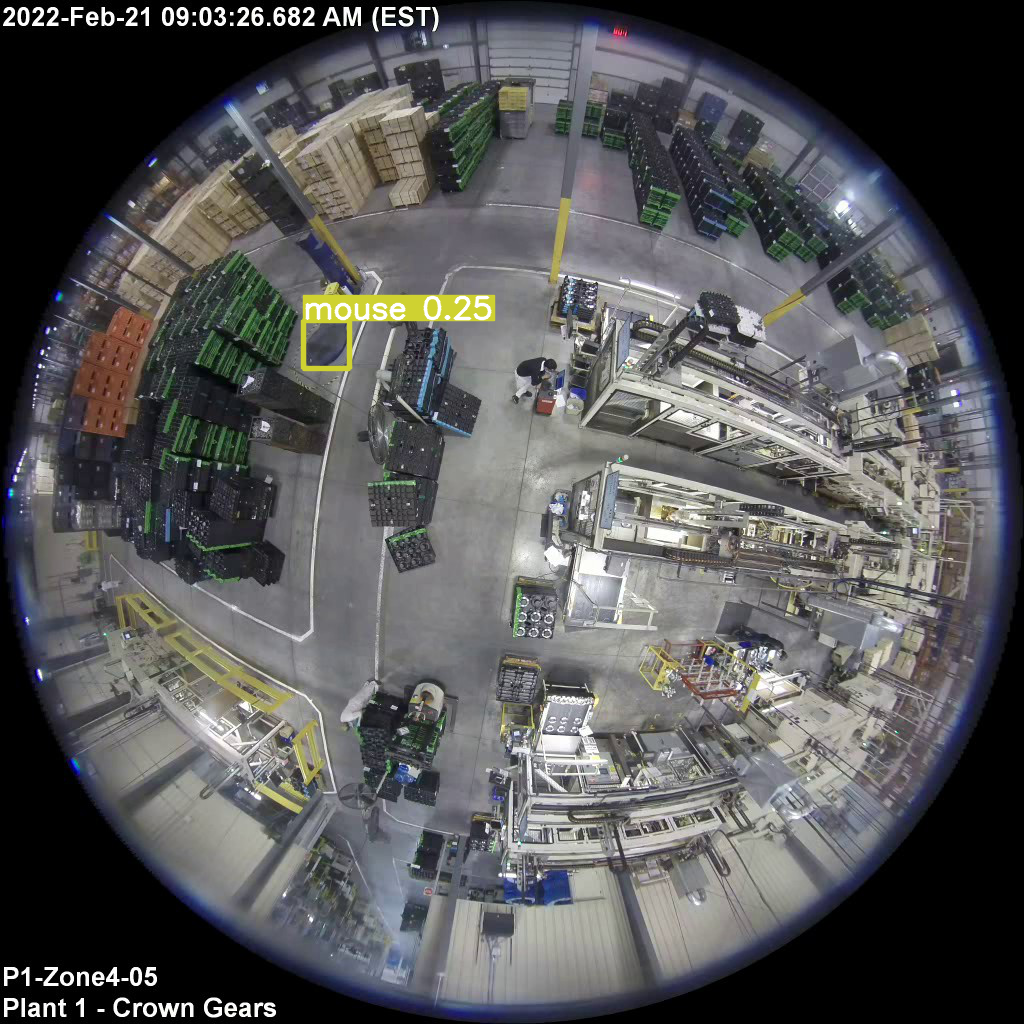

In [14]:
# Experimentation my making a prediction with a simple YOLOv5 Model

model = torch.hub.load('ultralytics/yolov5', 'yolov5l')
sample_img = './video_frames/frame_2023.jpg'

results = model(sample_img) # Run Inference

# Results
results.show()  # or .show(), .save(), .crop(), .pandas(), etc.

In [15]:
# CONSTANTS
BOUNDING_BOXES = [
    [502, 344, 61, 86],
    [627, 427, 193, 93],
    [522, 654, 90, 85],
    [704, 594, 90, 80],
    [545, 577, 81, 75],
    [460, 700, 52, 80]
]

SEED = 432904 # For random functions


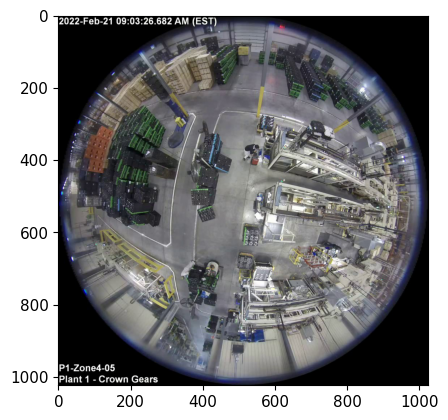

In [16]:
plt.imshow(Image.open(sample_img))

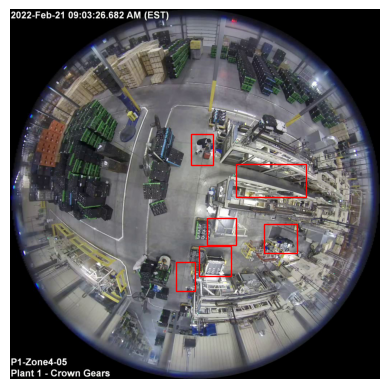

In [17]:
# Display ROIs onto image
def draw_ROIs_on_image(img_path):
    img = mpimg.imread(img_path)
    plt.axis('off')
    plt.imshow(img)
    for roi in range(len(BOUNDING_BOXES)):
        x = BOUNDING_BOXES[roi][0]
        y = BOUNDING_BOXES[roi][1]
        w = BOUNDING_BOXES[roi][2]
        h = BOUNDING_BOXES[roi][3]

        # Create a Rectangle patch
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')

        plt.gca().add_patch(rect) # Add the patch to the Axes

draw_ROIs_on_image(sample_img)

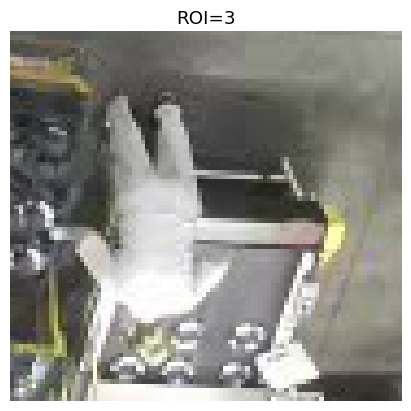

In [18]:
# Crop Images to ROIs
def crop_image_to_ROI(img_path, roi=0, plot=False):
    # roi is 0-indexed
    img = mpimg.imread(img_path)
    x = BOUNDING_BOXES[roi][0]
    y = BOUNDING_BOXES[roi][1]
    w = BOUNDING_BOXES[roi][2]
    h = BOUNDING_BOXES[roi][3]
    crop_img = img[y:y+h, x:x+w]
    if plot:
        plt.axis('off')
        plt.title(f"ROI={roi+1}")
        plt.imshow(crop_img)
    else:
        return crop_img

sample_img = './video_frames/frame_5223.jpg'
crop_image_to_ROI(sample_img, roi=2, plot=True)

Sample Image ROIs: ./video_frames/frame_5223.jpg


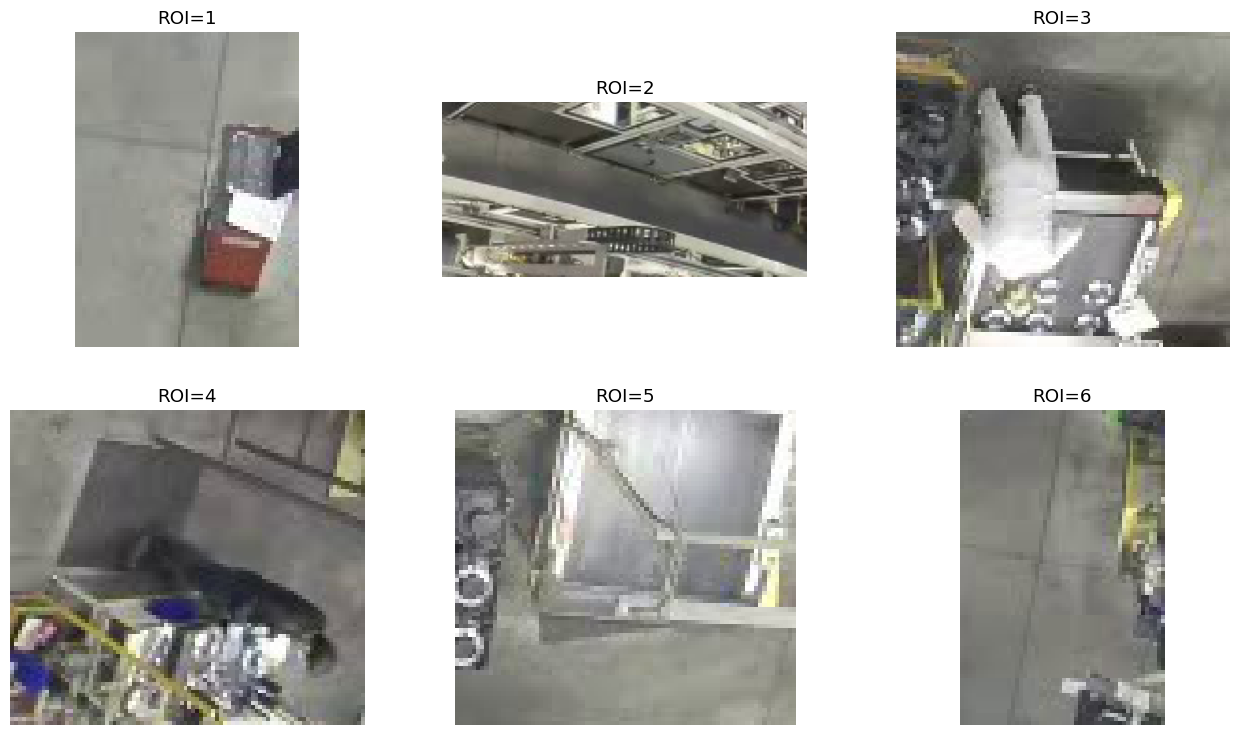

In [19]:
# Display a sample image
fig, ax = plt.subplots(2, 3, figsize=(16,9))

print(f"Sample Image ROIs: {sample_img}")
for i in range(2):
    for j in range(3):
    # roi is 0-indexed
        ax[i,j].axis('off')
        img = mpimg.imread(sample_img)
        x = BOUNDING_BOXES[i*3+j][0]
        y = BOUNDING_BOXES[i*3+j][1]
        w = BOUNDING_BOXES[i*3+j][2]
        h = BOUNDING_BOXES[i*3+j][3]
        crop_img = img[y:y+h, x:x+w]
        ax[i, j].set_title(f"ROI={i*3+j+1}")
        ax[i, j].imshow(crop_img)


In [21]:
# Get filenames labels for the images
import random
import os
import shutil
import glob
from PIL import Image, ImageDraw

def get_filenames(folder):
    filenames = []

    for path in glob.glob(os.path.join(folder, '*.jpg')):
        # Extract the filename
        filenames.append(path)

    return filenames

images = get_filenames("./video_frames")
random.Random(SEED).shuffle(images) # Shuffle Dataset
N = len(images)
N

13501

In [21]:
def crop_image_to_all_ROI(img_path):
    img_crops = []
    for roi in range(len(BOUNDING_BOXES)):
        img_crop = crop_image_to_ROI(img_path, roi)
        img_crops.append(img_crop)
    return img_crops

img_path = './video_frames/frame_5223.jpg'
img_crops = crop_image_to_all_ROI(img_path)
for i, img in enumerate(img_crops):
    im = Image.fromarray(img)
    if i == 2:
        im.save(f'./crops/roi{i+1}_{img_path.split("/")[2]}')